In [1]:
##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
## Read file and then sort 
csv_file = "companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date",
                                        "Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
companies_df.head(5)


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,#waywire,https://www.crunchbase.com/organization/waywire,"Media and Entertainment, Government and Milita...","New York, New York, United States",#waywire is an online community focused on soc...,"21,987",2012-06-01,NaT,1,2012-06-30,1750000,Seed,1750000,Was Acquired
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,"Science and Engineering, Hardware, Data and An...","New York, New York, United States","GramLabs is a start up, leveraging deep learni...","11,897",2015-08-01,NaT,1,2016-07-27,1000000,Seed,1000000,Operating
2,.io,https://www.crunchbase.com/organization/io-rea...,Data and Analytics,"Alexandria, Virginia, United States",.io is a real-time intelligence platform.,"16,844",2015-03-01,NaT,1,2015-10-01,1500000,Seed,1500000,Operating
3,/dev/color,https://www.crunchbase.com/organization/dev-color,NaN,"Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"35,003",2015-05-01,NaT,1,2016-08-23,120000,Seed,120000,Operating
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,"Software, Professional Services","San Francisco, California, United States",10by10 builds a marketplace to more quickly ma...,"59,822",2015-01-01,NaT,1,2017-07-01,120000,Seed,120000,Operating


In [3]:
companies_df = companies_df[["Company Name", "Founded Date", "Closed Date", 
                             "Number of Funding Rounds", "Last Funding Date", 
                             "Last Funding Amount", "Total Funding Amount", "Status"]]
companies_df.head(5)

,Company Name,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating


In [4]:
companies_pf = companies_df.rename(columns={
    "Company Name" : "Company",
    "Number of Funding Rounds" : "Funding Rounds"   
})

companies_pf.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating


In [5]:
## Read file and then sort 
funding = "Funding_Rounds.csv"
funding_df = pd.read_csv(funding, encoding="iso-8859-1", 
                         parse_dates=["Announced On Date"])
funding_df.head(5)


,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,TestMetal,https://www.crunchbase.com/organization/testmetal,Series A,690000,2015-07-10
1,WinApp Inc,https://www.crunchbase.com/organization/winapp...,Seed,2000000,2015-10-30
2,Cambly,https://www.crunchbase.com/organization/cambly,Seed,7000000,2016-09-01
3,Goboxi,https://www.crunchbase.com/organization/goboxi,Seed,3000000,2013-12-06
4,KaChing!,https://www.crunchbase.com/organization/kachin...,Seed,30000000,2017-02-24


In [6]:
funding_df = funding_df[["Company Name", "Funding Type", "Money Raised", 
                         "Announced On Date"]]
funding_df.head(5)

,Company Name,Funding Type,Money Raised,Announced On Date
0,TestMetal,Series A,690000,2015-07-10
1,WinApp Inc,Seed,2000000,2015-10-30
2,Cambly,Seed,7000000,2016-09-01
3,Goboxi,Seed,3000000,2013-12-06
4,KaChing!,Seed,30000000,2017-02-24


In [7]:
funding_pf = funding_df.rename(columns={
    "Company Name" : "Company"
})

funding_pf.head()

,Company,Funding Type,Money Raised,Announced On Date
0,TestMetal,Series A,690000,2015-07-10
1,WinApp Inc,Seed,2000000,2015-10-30
2,Cambly,Seed,7000000,2016-09-01
3,Goboxi,Seed,3000000,2013-12-06
4,KaChing!,Seed,30000000,2017-02-24


In [8]:
# Merge companies_pf and funding_pf on Company
merged_data = pd.merge(companies_pf, funding_pf,how="inner",on="Company")
merged_data.head(5)



,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01


In [9]:
# Save Data to csv without index, with header
merged_data.to_csv("merged_company_funding.csv", index=False, header=True)

In [10]:
## Read file and then sort 
org = "organizations.csv"
org_df = pd.read_csv(org, encoding="iso-8859-1")
org_df.head(5)                              

,crunchbase_uuid,type,primary_role,name,crunchbase_url,homepage_domain,homepage_url,profile_image_url,facebook_url,twitter_url,linkedin_url,stock_symbol,location_city,location_region,location_country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Organization,company,Wetpaint,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://www.crunchbase.com/organization/wetpai...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,https://www.linkedin.com/company/wetpaint,:,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Organization,company,Zoho,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com/,https://www.crunchbase.com/organization/zoho/p...,http://www.facebook.com/zoho,http://twitter.com/zoho,http://www.linkedin.com/company/zoho-corporati...,:,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Organization,company,Digg,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://www.crunchbase.com/organization/digg/p...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,:,New York,New York,USA,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Organization,investor,Omidyar Network,https://www.crunchbase.com/organization/omidya...,omidyar.com,http://www.omidyar.com,https://www.crunchbase.com/organization/omidya...,http://www.facebook.com/OmidyarNetwork,http://twitter.com/OmidyarNetwork,http://www.linkedin.com/company/22806,:,Redwood City,California,USA,Omidyar Network is an investment firm.
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Organization,company,Facebook,https://www.crunchbase.com/organization/facebo...,facebook.com,http://www.facebook.com,https://www.crunchbase.com/organization/facebo...,https://www.facebook.com/facebook/,https://twitter.com/facebook,http://www.linkedin.com/company/facebook,NASDAQ:FB,Menlo Park,California,USA,Facebook is an online social networking servic...


In [17]:
# Rename columns for readability
new_file = org_df.rename(columns={
    "crunchbase_uuid": "UUID",
    "name" : "Company",
    "homepage_url" : "Homepage"   
})

new_file.head(5)

,UUID,type,primary_role,Company,crunchbase_url,homepage_domain,Homepage,profile_image_url,facebook_url,twitter_url,linkedin_url,stock_symbol,location_city,location_region,location_country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Organization,company,Wetpaint,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://www.crunchbase.com/organization/wetpai...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,https://www.linkedin.com/company/wetpaint,:,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Organization,company,Zoho,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com/,https://www.crunchbase.com/organization/zoho/p...,http://www.facebook.com/zoho,http://twitter.com/zoho,http://www.linkedin.com/company/zoho-corporati...,:,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Organization,company,Digg,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://www.crunchbase.com/organization/digg/p...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,:,New York,New York,USA,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Organization,investor,Omidyar Network,https://www.crunchbase.com/organization/omidya...,omidyar.com,http://www.omidyar.com,https://www.crunchbase.com/organization/omidya...,http://www.facebook.com/OmidyarNetwork,http://twitter.com/OmidyarNetwork,http://www.linkedin.com/company/22806,:,Redwood City,California,USA,Omidyar Network is an investment firm.
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Organization,company,Facebook,https://www.crunchbase.com/organization/facebo...,facebook.com,http://www.facebook.com,https://www.crunchbase.com/organization/facebo...,https://www.facebook.com/facebook/,https://twitter.com/facebook,http://www.linkedin.com/company/facebook,NASDAQ:FB,Menlo Park,California,USA,Facebook is an online social networking servic...


In [18]:
new_file = new_file[["UUID", "Company", "Homepage"]]
new_file.head()


,UUID,Company,Homepage
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,http://www.wetpaint.com/
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,https://www.zoho.com/
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,http://www.digg.com
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,http://www.omidyar.com
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,http://www.facebook.com


In [20]:
# Save Data to csv without index, with header
new_file.to_csv("new_org.csv", index=False, header=True)

In [21]:
merged_df = pd.merge(merged_data, new_file,how="inner",on="Company")
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/


In [100]:
duplicated_df = merged_df[merged_df.duplicated(['Company'],keep=False)]

duplicated_df.head()


,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
6,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series C,55000000,2016-03-17,cf3b00cfffbf0e4f6427a60e5060de39,http://10xgenomics.com
7,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series B,55000000,2015-01-12,cf3b00cfffbf0e4f6427a60e5060de39,http://10xgenomics.com
8,10X Genomics,2012-01-01,NaT,3,2016-03-17,55000000,113000000,Operating,Series A,3000000,2012-10-08,cf3b00cfffbf0e4f6427a60e5060de39,http://10xgenomics.com
12,128 Technology,2014-07-07,NaT,4,2017-05-31,21500000,57499347,Operating,Series C,21500000,2017-05-31,b87dd21c6fbd9c7d43ee3ce97387825e,https://www.128technology.com/
13,128 Technology,2014-07-07,NaT,4,2017-05-31,21500000,57499347,Operating,Series B,20000000,2015-12-08,b87dd21c6fbd9c7d43ee3ce97387825e,https://www.128technology.com/


In [192]:
series_a = duplicated_df[duplicated_df['Funding Type'] == "Series A"]
# series_b = duplicated_df[duplicated_df['Funding Type'] == "Series B"]
# series_c = duplicated_df[duplicated_df['Funding Type'] == "Series C"]
# series_d = duplicated_df[duplicated_df['Funding Type'] == "Series D"]

# # x-axis
series_a_count = series_a.groupby(["Company"]).sum()["Money Raised"]
# #y-axis
series_a_total_count = series_a.groupby(["Company"]).count()["Funding Rounds"]


# # # x-axis
series_b_count = series_b.groupby(["Company"]).sum()["Money Raised"]
# # # #y-axis
series_b_total_count = series_b.groupby(["Company"]).count()["Funding Rounds"]

# # # # x-axis
series_c_count = series_c.groupby(["Company"]).sum()["Money Raised"]
# # #y-axis
series_c_total_count = series_c.groupby(["Company"]).count()["Funding Rounds"]

series_d_count = series_d.groupby(["Company"]).sum()["Money Raised"]
# # # #y-axis
series_d_total_count = series_d.groupby(["Company"]).count()["Funding Rounds"]


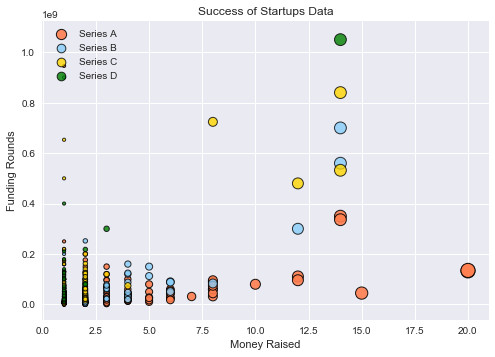

In [193]:
plt.scatter(series_a_total_count,
            series_a_count,
            s=10*series_a_total_count, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.9, label="Series A")

plt.scatter(series_b_total_count,
            series_b_count,
            s=10*series_b_total_count, c="lightskyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Series B")

plt.scatter(series_c_total_count,
            series_c_count,
            s=10*series_c_total_count, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Series C")

plt.scatter(series_d_total_count,
            series_d_count,
            s=10*series_d_total_count, c="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Series D")

# # Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="City Types",
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]

# Create legend.
plt.legend(loc='upper left')                      
plt.title("Success of Startups Data")
plt.xlabel("Money Raised")
plt.ylabel("Funding Rounds")
plt.grid(True)


plt.show()

In [118]:
fund_dup = duplicated_df.groupby('Company')["Money Raised"].sum()

fund_dup.head()

Company
10X Genomics              113000000
128 Technology             57499347
17hats                      5250000
1Huddle                      625000
2020 On-site Optometry      6499965
Name: Money Raised, dtype: int64

In [133]:
# x axis for funding_average_per_type_bar_chart 
funding_types = duplicated_df["Funding Type"].unique()
#y axis
fund_dup = np.array(duplicated_df.groupby('Funding Type')["Money Raised"].sum())


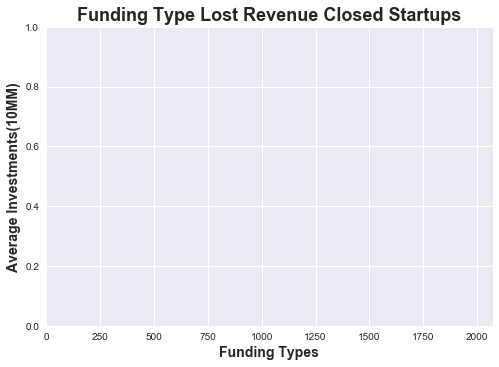

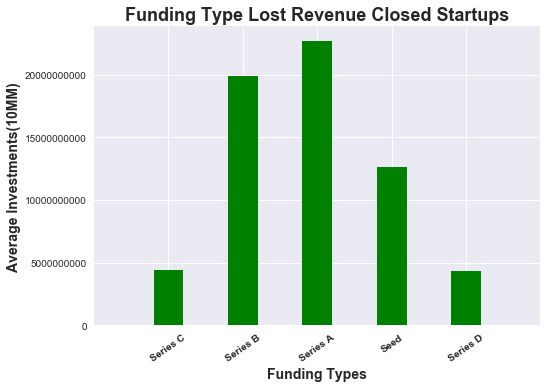

In [134]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+1)
xtick_locations = [x for x in x_axis]

ax.set_title("Funding Type Lost Revenue Closed Startups", weight='bold').set_fontsize('18')
ax.set_xlabel("Funding Types", weight='bold').set_fontsize('14')
ax.set_ylabel("Average Investments(10MM)", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types) +1)

plt.ticklabel_format(style = 'plain')

ax.bar(x_axis, fund_dup, facecolor="green", width=.4)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')
# ax.set_yticklabels([0,10,20,30,40,50,60,70],
#                    rotation=360, weight='bold')

# plt.tight_layout()
# plt.savefig("funding_type_closed_revenue.png")
plt.show()

In [ ]:
companies_dup = duplicated.groupby('Company')["Funding Type"].sum()
companies_dup

In [23]:
merged_df.dtypes

Company                         object
Founded Date            datetime64[ns]
Closed Date             datetime64[ns]
Funding Rounds                   int64
Last Funding Date       datetime64[ns]
Last Funding Amount              int64
Total Funding Amount             int64
Status                          object
Funding Type                    object
Money Raised                     int64
Announced On Date       datetime64[ns]
UUID                            object
Homepage                        object
dtype: object

In [ ]:
# # Convert fields to usable formats
# merged_df["Money Raised"] = merged_df["Money Raised"].str.strip() \
#                                                    .replace('[\$,]','', regex=True ).astype(np.int64)
    
# merged_df["Last Funding Amount"] = merged_df["Last Funding Amount"] \
#                                                    .replace('[\$,]','', regex=True ).astype(np.int64)
# merged_df["Total Funding Amount"] = merged_df["Total Funding Amount"] \
#                                                    .replace('[\$,]','', regex=True ).astype(np.int64)
# merged_df.head(5)

In [24]:
# works
for i, el in enumerate(merged_df.iterrows()):
    val = el[1]['UUID'].replace("-", "")
    merged_df.set_value(i, "UUID", val)
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/


In [25]:
# Save Data to csv without index, with header
merged_df.to_csv("all_files_merged_df.csv", index=False, header=True)

In [26]:
# Expore the data
min_found_date = min(merged_df["Founded Date"])
print("Min founded date ", min_found_date)

Min founded date  2012-01-01 00:00:00


In [27]:
# Expore the data
max_close_date = max(merged_df["Closed Date"])
print("Max closed date ", max_close_date)

Max closed date  NaT


In [68]:
# sum of counts is 10278
funding_pct = merged_df.groupby('Funding Type')["Money Raised"].count()
funding_pct


Funding Type
Seed        6030
Series A    2864
Series B    1046
Series C     279
Series D      59
Name: Money Raised, dtype: int64

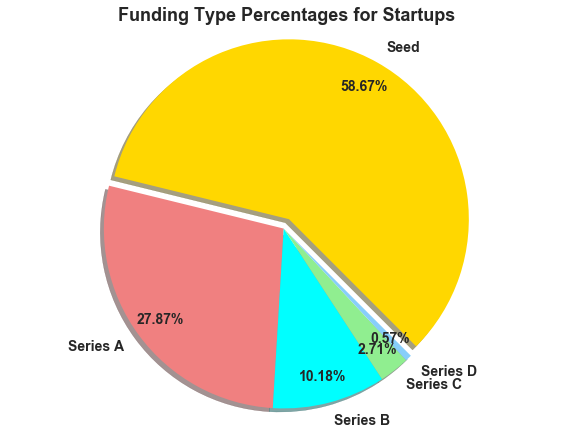

In [244]:
plt.rcParams['font.size'] = 8.0

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_pct
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.06, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=-45, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_count_pie_chart.png")

plt.show()

In [28]:
# Expore the data
# 286 records with Status == "Closed"
closed_df = merged_df.loc[merged_df["Status"] == "Closed"]
closed_df.head(5)
#print(len(closed_df.index))

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
31,27 Perry,2012-01-01,2013-01-01,1,2012-05-17,118000,118000,Closed,Seed,118000,2012-05-17,40d8d076df13484162029389201bb1fa,http://www.27perry.com
58,4wrdtech,2015-05-29,NaT,1,2015-12-08,80000,80000,Closed,Seed,80000,2015-12-08,84420e6294f4ea624ed9711a96f467c9,https://4wrdtech.com
200,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,1000000,2015-11-01,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com
201,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,150000,2014-07-02,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com
426,Alekto,2012-07-01,2013-01-01,1,2012-08-27,50000,50000,Closed,Seed,50000,2012-08-27,0e19d30ebf03535f97daef13751335e0,http://www.alekto.co


In [46]:
closed_count = closed_df.groupby('Funding Type')["Money Raised"].count()
closed_count.head(10)

Funding Type
Seed        222
Series A     51
Series B     13
Name: Money Raised, dtype: int64

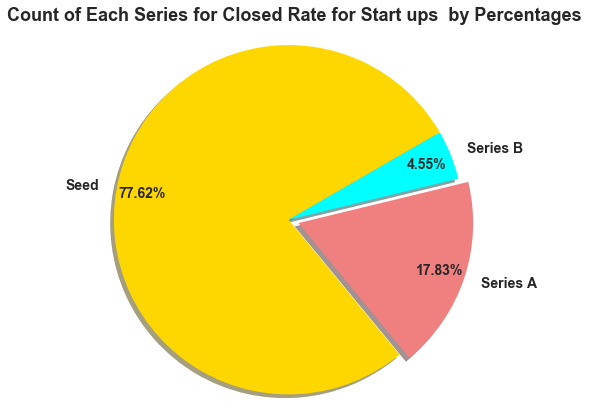

In [219]:
plt.rcParams['font.size'] = 12.0

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B"]
numbers = closed_count
colors = ["gold", "lightcoral", "cyan"]
explode = (0, 0.06, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Count of Each Series for Closed Rate for Start ups  by Percentages", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_closed_rate_pie_chart.png")

plt.show()

In [48]:
closed_sum = closed_df.groupby('Funding Type')["Money Raised"].sum()
closed_sum.head(10)

Funding Type
Seed        127886653
Series A    488779299
Series B    279000000
Name: Money Raised, dtype: int64

In [75]:
# y axis for funding_average_per_type_bar_chart 
fund_closed = np.array(closed_df.groupby('Funding Type')["Money Raised"].sum())
#fund_avgs

In [76]:
# x axis for funding_average_per_type_bar_chart 
funding_types = closed_df["Funding Type"].unique()
#funding_types

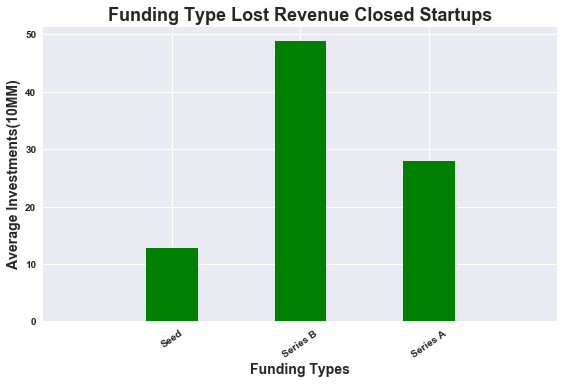

In [83]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+ 1)
xtick_locations = [x for x in x_axis]

ax.set_title("Funding Type Lost Revenue Closed Startups", weight='bold').set_fontsize('18')
ax.set_xlabel("Funding Types", weight='bold').set_fontsize('14')
ax.set_ylabel("Average Investments(10MM)", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types)+ 1)

plt.ticklabel_format(style = 'plain')

ax.bar(x_axis, fund_closed, facecolor="green", width=.4)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')
ax.set_yticklabels([0,10,20,30,40,50,60,70],
                   rotation=360, weight='bold')

plt.tight_layout()
plt.savefig("funding_type_closed_revenue.png")
plt.show()

In [29]:
# 9302 records with Status == "Operating"
oper_df = merged_df.loc[merged_df["Status"] == "Operating"]
oper_df.head(5)
#print(len(oper_df.index))

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/
5,10-4 Systems,2012-01-01,NaT,1,2016-06-27,13900000,13900000,Operating,Series A,13900000,2016-06-27,35ca612cf370d2dfe3db63554192f84a,https://www.10-4.com/


In [62]:
# Funding Type counts
operating = oper_df["Funding Type"].value_counts()
operating

Seed        5434
Series A    2594
Series B     953
Series C     264
Series D      57
Name: Funding Type, dtype: int64

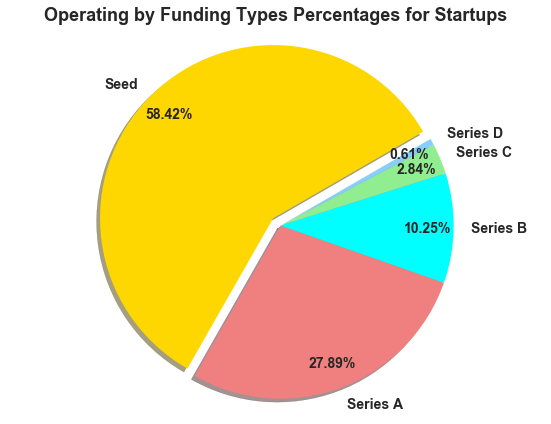

In [243]:
# Funding Type counts
plt.rcParams['font.size'] = 10.0

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = operating
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.06, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Operating by Funding Types Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_operating_pie_chart.png")
plt.show()

In [33]:
# groupby Funding Type and count states within each type
status = merged_df.groupby('Funding Type')["Status"].value_counts()
status.head(10)

Funding Type  Status      
Seed          Operating       5434
              Was Acquired     371
              Closed           222
              IPO                3
Series A      Operating       2594
              Was Acquired     203
              Closed            51
              IPO               16
Series B      Operating        953
              Was Acquired      65
Name: Status, dtype: int64

In [34]:
df1 = pd.DataFrame(status).rename(columns={
    'Status':'Count'})

df1.head(5)

Count
Funding Type Status             
Seed         Operating      5434
             Was Acquired    371
             Closed          222
             IPO               3
Series A     Operating      2594

In [35]:
series_d = merged_df[merged_df['Funding Type'] == "Series D"]
series_d

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
79,908 Devices,2012-01-01,NaT,5,2017-03-15,20000000,49300000,Operating,Series D,20000000,2017-03-15,9c3b4ae472afb6d63f029c811f56fb40,http://908devices.com
421,Alector,2013-01-01,NaT,3,2016-01-07,29500000,61500000,Operating,Series D,29500000,2016-01-07,9dd3b221ff3bbdb834da7774e6510b63,http://alector.com
932,AveXis,2013-01-01,NaT,4,2015-09-08,65000000,75000000,Was Acquired,Series D,65000000,2015-09-08,b09be91c91a9632e870dc5ed83c46717,https://avexis.com/
1319,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,e35a34d36b1d1d5b1665190c7daa4460,http://www.blendsd.com
1320,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,5058d5cd4c08c241165923dec5136c9d,https://www.blend.com
1321,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,a2c48634a8fd8030f6a1306cf29d50ff,http://www.blend.life
1647,Bustle Digital Group,2013-01-01,NaT,5,2017-03-10,12000000,50500000,Operating,Series D,12000000,2017-03-10,b7d88b9f3a746aea845159ecd4851518,http://bustle.com
1831,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,2017-06-27,45a8a2d2d13fb336348a2b0bc1a80b01,http://www.gocatalant.com
1832,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,2017-06-27,9b67b0f7b229dcf63a1bb4ecc971ce14,http://catalant.co
2060,CloudHealth Technologies,2012-01-01,NaT,5,2017-06-27,46000000,85700000,Operating,Series D,46000000,2017-06-27,1ea93e4f355c999ba61d96482d7e42ee,http://www.cloudhealthtech.com


In [205]:
funding_df = merged_df[merged_df['Funding Type'] == "Seed"]
funding_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/
9,10sec,2013-07-08,NaT,2,2014-05-08,1600000,1600000,Operating,Seed,1600000,2014-05-08,79fd01f688736282a9ea27622d0bbdcb,https://10s.ec/
10,12 Labs,2014-08-01,NaT,1,2014-11-26,935000,935000,Operating,Seed,935000,2014-11-26,74a66ef358d3adec5740ae7794dd6dbd,http://www.getapplause.com/
11,121 Mobile,2012-02-17,NaT,4,2015-12-18,2200000,4000000,Operating,Seed,2200000,2015-12-18,8d43a7efac3c3977c8d7b62377f1d97a,http://my121mobile.com
15,128 Technology,2014-07-07,NaT,4,2017-05-31,21500000,57499347,Operating,Seed,4000000,2014-07-07,b87dd21c6fbd9c7d43ee3ce97387825e,https://www.128technology.com/
17,17hats,2014-01-01,NaT,2,2015-10-15,4000000,5250000,Operating,Seed,1250000,2015-02-18,c852c5d3220d2eb6c78e3c9148430ce4,https://www.17hats.com


In [207]:
acquired = merged_df[merged_df['Status'] == "Was Acquired"]
#seed_df = merged_df[merged_df['Funding Type'] == "Seed"]

#seed_df = seed_df[seed_df['Status'] == "Was Acquired"]

acquired

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
75,800razors,2012-01-01,NaT,1,2013-02-19,100000,100000,Was Acquired,Series A,100000,2013-02-19,780b9eb9cba97e56b53ffc7d202e38eb,http://www.800razors.com
97,ADSHIFT,2013-01-01,NaT,1,2016-02-23,650000,650000,Was Acquired,Seed,650000,2016-02-23,360b3ff456ea726878f6c01978e94f60,https://adshift.com/
165,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,2013-12-25,def201e83bc97dffe76410a6371121eb,http://abakus.me
166,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,2013-12-25,7e5d80ede34c3c4bc34c0099b4c5ea4f,http://www.abakus.com
167,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,425000,2014-07-11,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
168,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,225000,2014-04-06,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
169,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,100000,2014-01-30,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
170,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,25000,2013-07-30,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
211,Acer Therapeutics,2013-01-01,NaT,2,2016-05-06,8149998,10249998,Was Acquired,Series B,8149998,2016-05-06,2462e41898d75f25cffa2f1081d2a8aa,http://www.acertx.com/


In [209]:
acquired_count = acquired.groupby('Funding Type')["Money Raised"].count()
acquired_count.head(10)

Funding Type
Seed        371
Series A    203
Series B     65
Series C     13
Series D      2
Name: Money Raised, dtype: int64

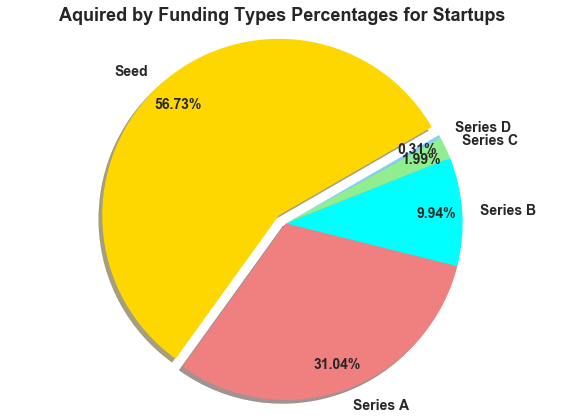

In [242]:
plt.rcParams['font.size'] = 12.0

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = acquired_count
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.06, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Aquired by Funding Types Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_aquired_pie_chart.png")

plt.show()

In [208]:
ipo = merged_df[merged_df['Status'] == "IPO"]
ipo

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
305,Aeglea BioTherapeutics,2013-01-01,NaT,2,2015-03-23,44000000,56000000,IPO,Series B,44000000,2015-03-23,55c20f7153b8b8607e3980c366709d88,http://aegleabio.com
306,Aeglea BioTherapeutics,2013-01-01,NaT,2,2015-03-23,44000000,56000000,IPO,Series A,12000000,2014-02-06,55c20f7153b8b8607e3980c366709d88,http://aegleabio.com
1803,Carvana,2013-01-01,NaT,3,2016-08-10,160000000,300000000,IPO,Series C,160000000,2016-08-10,5971d22a87a202accbaef6ae5f888543,http://www.carvana.com/
1804,Carvana,2013-01-01,NaT,3,2016-08-10,160000000,300000000,IPO,Series B,90000000,2015-05-15,5971d22a87a202accbaef6ae5f888543,http://www.carvana.com/
1805,Carvana,2013-01-01,NaT,3,2016-08-10,160000000,300000000,IPO,Series A,50000000,2013-01-23,5971d22a87a202accbaef6ae5f888543,http://www.carvana.com/
2337,ContraVir Pharmaceuticals,2013-01-01,NaT,3,2014-10-15,9000000,16967648,IPO,Series A,9000000,2014-10-15,8ba69dce1ac711b4fb0c6a64e0d5c7ae,http://contravir.com
2392,Corvus Pharmaceuticals,2014-01-01,NaT,2,2015-09-25,75000000,108500000,IPO,Series B,75000000,2015-09-25,b31b85a66fb289cca7bdd1c1edbbb278,http://www.corvuspharma.com/
2393,Corvus Pharmaceuticals,2014-01-01,NaT,2,2015-09-25,75000000,108500000,IPO,Series A,33500000,2014-12-01,b31b85a66fb289cca7bdd1c1edbbb278,http://www.corvuspharma.com/
2997,Editas Medicine,2013-01-01,NaT,3,2015-08-10,120000000,210000000,IPO,Series B,120000000,2015-08-10,39eda1cf422b4fd6c9ea7b295bfc4e69,http://www.editasmedicine.com
2998,Editas Medicine,2013-01-01,NaT,3,2015-08-10,120000000,210000000,IPO,Series A,43000000,2013-11-25,39eda1cf422b4fd6c9ea7b295bfc4e69,http://www.editasmedicine.com


In [210]:
ipo_count = ipo.groupby('Funding Type')["Money Raised"].count()
ipo_count.head(10)

Funding Type
Seed         3
Series A    16
Series B    15
Series C     2
Name: Money Raised, dtype: int64

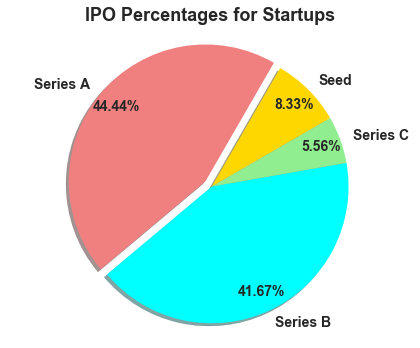

In [237]:
plt.rcParams['font.size'] = 12.0

fig = plt.figure(figsize=[6, 5])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C"]
numbers = ipo_count
colors = ["gold", "lightcoral", "cyan", "lightgreen"]
explode = (0, 0.06, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("IPO Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_ipo_pie_chart.png")

plt.show()

In [38]:
funding_sum = merged_df.groupby('Funding Type')["Money Raised"].sum()
funding_sum

Funding Type
Seed         7779876098
Series A    28365357631
Series B    24141335760
Series C    12869981307
Series D     4330750000
Name: Money Raised, dtype: int64

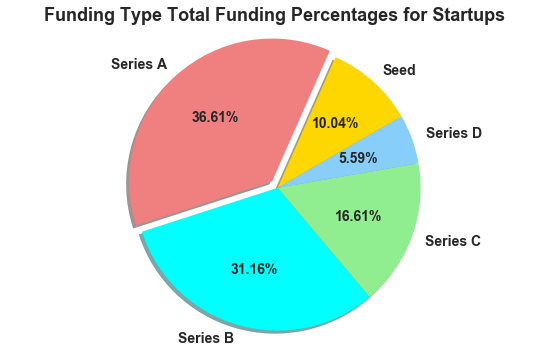

In [240]:
plt.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_sum
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0, 0.06, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Total Funding Percentages for Startups", 
             weight='bold').set_fontsize('18')
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'},
       shadow=True, startangle=30)
ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_sum_pie_chart.png")

plt.show()

In [69]:
# y axis for funding_average_per_type_bar_chart 
fund_avgs = np.array(merged_df.groupby('Funding Type')["Money Raised"].median())
#fund_avgs

In [70]:
# x axis for funding_average_per_type_bar_chart 
funding_types = merged_df["Funding Type"].unique()
#funding_types

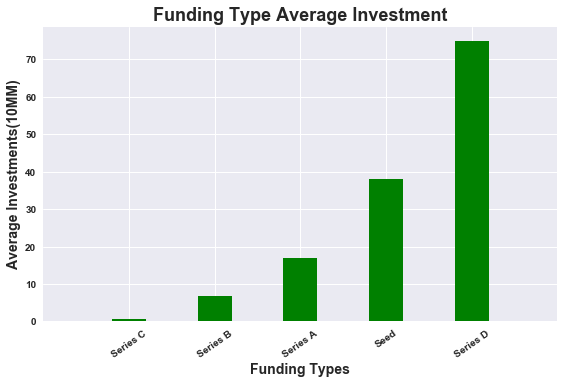

In [197]:
# funding_average_per_type_bar_chart 
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+ 1)
xtick_locations = [x for x in x_axis]

ax.set_title("Funding Type Average Investment", weight='bold').set_fontsize('18')
ax.set_xlabel("Funding Types", weight='bold').set_fontsize('14')
ax.set_ylabel("Average Investments(10MM)", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types)+ 1)

plt.ticklabel_format(style = 'plain')

ax.bar(x_axis, fund_avgs, facecolor="green", width=.4)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')
ax.set_yticklabels([0,10,20,30,40,50,60,70],
                   rotation=360, weight='bold')

plt.tight_layout()
plt.savefig("funding_type_avg_investment.png")
plt.show()

In [ ]:
# # The original top_orgs.xslx had the wrong url so this is a 
# # manual process to get the Homepage for Screen Scraping.
# # The automated process can be built on this process.
# # 
# # 1) Remove duplicates from copy of merged_df
# # 2) Copy the output into top_orgs_search_results.txt
# # 3) Manually copy the homepage url into top_orgs.xlsx and
# #    create top_orgs.csv.
# # 4) Searched organizations.xlsx manually and found Ripcord, 
# #    IndoorAtlas, and Truss.
# # 5) Found 46 of 50 urls.

# Copy merged_df to a temp data frame for processing
tmp_merged_df = merged_df

# Remove duplicates method 1:
# tmp_merged_df = tmp_merged_df.groupby(["Company","Homepage"]).max()
# tmp_merged_df.reset_index(inplace=True)
# or
# Remove duplicates method 2:
tmp_merged_df = tmp_merged_df.drop_duplicates(subset=["Company","Homepage"],
                                              keep="last").reset_index(drop=True)

count = 0

## Iterate over the top_orgs rows and lookup the homepage via the Company
## This doesn't give what I want so I manually copied the url into top_orgs.xlsx
## and created top_orgs.csv.
for index, row in top_orgs.iterrows():
    try:
        # Use Company to get Homepage
        print("This is the result for: ", row["Company"])
        #print(tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]].values)
        print(tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]])
        count += 1
        ## Set the cell info for Homepage (Doesn't work!)
        # example: print(df.loc[df['D'] == 14]['A'].values)
        #url = tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]]
        #top_orgs.set_value(index, "Homepage", url)
    except:
        print("Error for: ", row["Company"])  

print("top_orgs rows processed: ", count)


In [ ]:
## File with url manually added for screen scraping using
## the output file top_orgs_match_orgs_results.docx
## Read file and then sort 
csv_file = "top_orgs.csv"
top_orgs = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])
top_orgs = top_orgs.sort_values("Funding Type").reset_index(drop=True)
top_orgs.head(5)


In [ ]:
import numpy as np

top_orgs["Money Raised"] = top_orgs["Money Raised"].replace('[\$,]','', regex=True ).astype(np.int64)
top_orgs["Homepage"] = top_orgs["Homepage"].replace(np.nan, '', regex=True)

#top_orgs["Homepage"] = ""
top_orgs["Total Visits"] = ""
top_orgs["Avg Visit Duration"] = ""
top_orgs["Pages Per Visit"] = ""
top_orgs["Bounce Rate"] = ""
print(len(top_orgs.index))
top_orgs.head(5)


In [ ]:
# Save file with urls prior to scraping.to csv without index, with header
top_orgs.to_csv("pre-screen_scrape_data.csv", index=False, header=True)

In [ ]:
## Web scraping program with 20 second sleep time.
## Consider using a smaller subset of data for scraping.

##  Test URL https://www.similarweb.com/website/shotput.com#overview 

## Splinter documenation:
## https://github.com/douglasmiranda/splinter-examples/blob/master/another_examples/screenshot.py
## http://splinter.readthedocs.io/en/latest/tutorial.html

## BeautifulSoup Documentation:
## https://www.crummy.com/software/BeautifulSoup/bs4/doc


# from splinter import Browser
# import csv
# from bs4 import BeautifulSoup 
# import time

# # browser = Browser('chrome')
# # browser = Browser('firefox')

# with Browser() as browser:
#     # Visit URL
#     url1 = "https://www.similarweb.com/website/" 
#     url_suffix = "#overview"
    
#     # loop thru the urls top_orgs data frame 
#     counter = 0
#     for index, row in top_orgs.iterrows():
#         url = ""
#         #print(type(row["Homepage"]))
#         url2 = row["Homepage"].split('/')
#         if len(url2) > 2:
#             counter += 1
#             url = url1 + url2[2] + url_suffix
#             print("url counter: ", counter,end=" - ")
#             print(url)
        
#             try:
#                 browser.visit(url)
#                 time.sleep(20)
#                 html = browser.html
#                 soup = BeautifulSoup(html, "html.parser")
            
#                 #print(soup.prettify())
   
#                 count = 0
#                 # Grab the 4 activity stats from the html 
#                 for line in soup.findAll('span',class_="engagementInfo-valueNumber js-countValue"):
#                     print(line.get_text())
#                     count += 1
#                     # Write to a data frame
#                     if count == 1:
#                         top_orgs.set_value(index, "Total Visits", line.getText())
#                     elif count == 2:
#                         top_orgs.set_value(index, "Avg Visit Duration", line.getText())
#                     elif count == 3:
#                         top_orgs.set_value(index, "Pages Per Visit", line.getText())
#                     else:
#                         top_orgs.set_value(index, "Bounce Rate", line.getText())
#             except:
#                 print("Error with url: ", url)  
# top_orgs
# print("urls processed: ", counter)


In [ ]:
# Save Data to csv without index, with header
#top_orgs.to_csv("screen_scrape_data.csv", index=False, header=True)

In [ ]:
top_orgs.head(5)

In [ ]:
## Reload data to work with Screen scrape data without more scraping
## Read file 

csv_file = "screen_scrape_data.csv"
top_orgs = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])

top_orgs["Money Raised"] = top_orgs["Money Raised"].replace('[\$,]','', regex=True ).astype(np.int64)
top_orgs["Homepage"] = top_orgs["Homepage"].replace(np.nan, '', regex=True)
top_orgs["Total Visits"] = top_orgs["Total Visits"].replace(np.nan, '', regex=True)
top_orgs["Avg Visit Duration"] = top_orgs["Avg Visit Duration"].replace(np.nan, '', regex=True)
top_orgs["Pages Per Visit"] = top_orgs["Pages Per Visit"].replace(np.nan, '', regex=True)
top_orgs["Bounce Rate"] = top_orgs["Bounce Rate"].replace(np.nan, '', regex=True)

top_orgs.head(6)
#top_orgs.dtypes

In [ ]:
# Remove rows we don't need to process
top_orgs = top_orgs.loc[top_orgs["Total Visits"]!= "",["Company","Funding Type",
                           "Money Raised","Announced On Date","Homepage","Total Visits",
                           "Avg Visit Duration","Pages Per Visit","Bounce Rate"]]
top_orgs.head(6)
#top_orgs.dtypes

In [ ]:
## http://matplotlib.org/faq/howto_faq.html#plot-numpy-datetime64-values


# Convert columns to usable data types
top_orgs["Total Visits"] = top_orgs["Total Visits"].apply(lambda x: x.replace('[<>K]','', regex=True ).astype(np.float64)* 1000 if x.str.contains("K") else x.replace('[<>M]','', regex=True ).astype(np.float64)* 1000000)                                         
  
#top_orgs["Total Visits"].apply(lambda x: x.replace('[<>K]','', regex=True ).astype(np.float64)* 1000 if x.str.contains("K") else x.replace('[<>M]','', regex=True ).astype(np.float64)* 1000000)                                         
  
    
# top_orgs["Total Visits"] = top_orgs["Total Visits"].replace('[<>K]','',
#                                                                 regex=True ).astype(np.int64)* 1000
# .str.contains('M'):
    
# top_orgs["Total Visits"] = top_orgs["Total Visits"].replace('[<>M]','',
#                                                  regex=True ).astype(np.int64)* 1000000

# top_orgs["Avg Visit Duration"] = pd.to_datetime(top_orgs["Avg Visit Duration"],format="%H:%M:%S")

# top_orgs["Bounce Rate"] = top_orgs["Bounce Rate"].replace('[%]','', regex=True ).astype(np.float64)

# top_orgs["Pages Per Visit"] = top_orgs["Pages Per Visit"].astype(np.float64)

#top_orgs.dtypes



top_orgs.head(5)

In [ ]:
# top_orgs["Avg Visit Duration"] = pd.to_datetime(top_orgs["Avg Visit Duration"], format="%H:%M:%S").dt.time
# import datetime as dt  dt=datetime.strptime(start,"%H:%M:%S").time()
# import re  line = re.sub('[!@#$]', '', line)


# top_orgs["Total Visits"] = top_orgs["Total Visits"].replace('[<>K]','', regex=True ) \
# .astype(np.int32) * 1000

# #top_orgs["Avg Visit Duration"] = pd.to_datetime(top_orgs["Avg Visit Duration"],format="%H:%M:%S")

# top_orgs["Bounce Rate"] = top_orgs["Bounce Rate"].replace('[%]','', regex=True ).astype(np.float64)

# top_orgs["Pages Per Visit"] = top_orgs["Pages Per Visit"].astype(np.float64)
# top_orgs
